In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../Desktop/Kaggle/train.csv')
test = pd.read_csv('../Desktop/Kaggle/test.csv')
full = pd.concat([train,test])

In [3]:
full.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [4]:
full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
full.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [7]:
full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [8]:
full.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


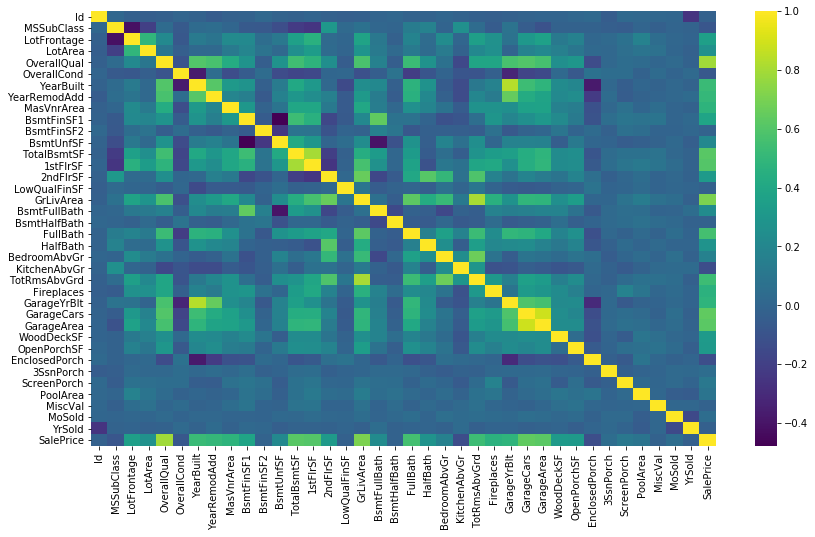

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(full.corr(),cmap='viridis')

In [10]:
all_data_na = (full.isnull().sum() / len(full)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

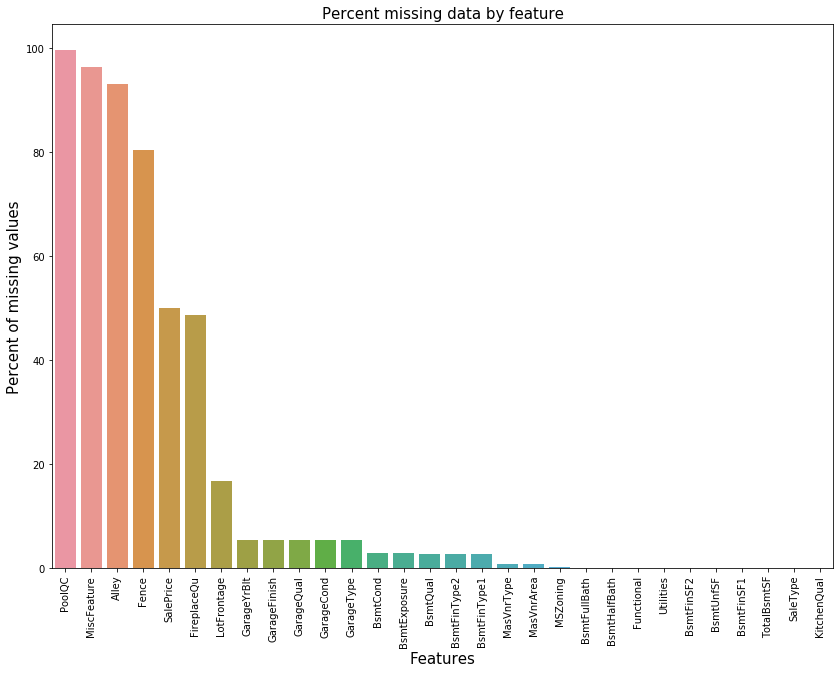

In [11]:
f, ax = plt.subplots(figsize=(14, 10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [12]:
# List of columns with null values

with_null = full.columns[full.isna().any()]
with_null

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

# Filling in all the null values

In [13]:
# Alley
# From data_describtion we known 'NaN' means 'No Alley'

full['Alley'] = full['Alley'].fillna('No Alley')

In [14]:
# MSZoning

full['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [15]:
full[full['MSZoning'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,No Alley,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
756,2217,20,NaN,80.0,14584,Pave,No Alley,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
790,2251,70,NaN,NaN,56600,Pave,No Alley,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
1444,2905,20,NaN,125.0,31250,Pave,No Alley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


In [16]:
# We do not see any specific correlation, 
# given the small number of NaN values we replace it with the most common value 'RL'

full['MSZoning'] = full['MSZoning'].fillna(value = 'RL')

In [17]:
#Utilities

full['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [18]:
# We drop this variable 

full = full.drop('Utilities',axis=1)

In [19]:
#Exterior 1st Exterior 2nd

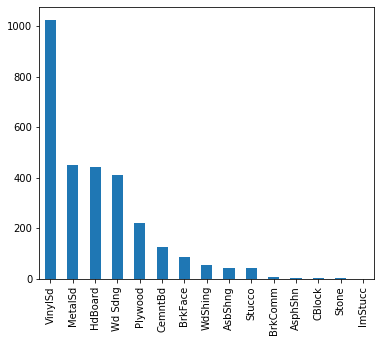

In [20]:
fig = plt.figure(figsize=(6,5))
full['Exterior1st'].value_counts().plot(kind='bar')

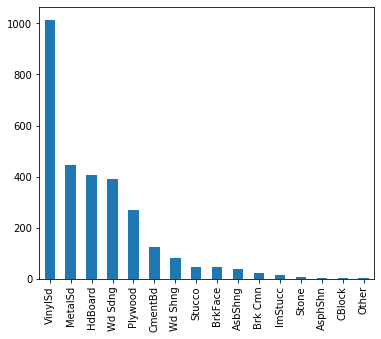

In [21]:
fig = plt.figure(figsize=(6,5))
full['Exterior2nd'].value_counts().plot(kind='bar')

In [22]:
# We will in the NaN values with the most most common value 'VinylSd'

full['Exterior1st'] = full['Exterior1st'].fillna('VinylSd')
full['Exterior2nd'] = full['Exterior2nd'].fillna('VinylSd')

In [23]:
#MasVnrType #MasVnrArea

In [24]:
full['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [25]:
full.groupby('MasVnrType').mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,1263.480000,37.400000,77.444444,17178.560000,5.360000,5.520000,1960.640000,1974.680000,195.480000,368.680000,...,74.440000,55.960000,28.760000,0.000000,15.800000,0.000000,100.000000,6.400000,2007.480000,146318.066667
BrkFace,1435.249147,58.452787,73.668630,10386.225256,6.639363,5.410694,1984.242321,1988.193402,261.672355,562.977247,...,116.464164,53.707622,11.531286,3.547213,21.549488,2.237770,44.453925,6.255973,2007.725825,204691.871910
None,1476.004018,57.049369,66.074597,9801.394948,5.613662,5.711251,1960.989093,1980.119403,0.707233,343.110856,...,79.028129,40.579793,31.168197,2.132606,13.661883,2.285878,49.618829,6.166475,2007.805970,156221.891204
Stone,1422.128514,56.024096,76.047826,11114.108434,7.441767,5.152610,1996.112450,1998.650602,239.550201,703.522088,...,120.337349,69.437751,7.526104,3.064257,15.060241,2.506024,81.726908,6.232932,2007.991968,265583.625000


In [26]:
# We see there exits a correlation with the YearBuilt variable 
# If the property was recently built (later than 1995) it most likely has a "Stone" MasVnrType
# For the older properties (Around 1960) we can assign it to the "None" or "BrkCmn" class
# But we will assign it to "None" since it appears substantially more often

use_year = full[full['MasVnrType'].isna()]['YearBuilt']
use_year

234     2002
529     1957
650     2007
936     2003
973     2007
977     2006
1243    2006
1278    2002
231     2002
246     2008
422     2002
532     2002
544     2006
581     2002
851     2007
865     2003
880     2007
889     2007
908     2006
1132    2006
1150    1961
1197    2005
1226    2006
1402    2002
Name: YearBuilt, dtype: int64

In [27]:
def fill_na_masvnr(MasVnrType,YearBuilt):
    if pd.isnull(MasVnrType):
        if YearBuilt > 2000:
            return 'Stone'
        elif pd.isnull(YearBuilt):
            return 'None'
        else:
            return 'None'
    else:
        return MasVnrType

In [28]:
full['MasVnrType'] = full.apply(lambda x : fill_na_masvnr(x['MasVnrType'],x['YearBuilt']),axis=1)

In [29]:
# MasVnrArea
# It is a continuous variable with les than 1% values

full['MasVnrArea'] = full['MasVnrArea'].fillna(full['MasVnrArea'].mean())

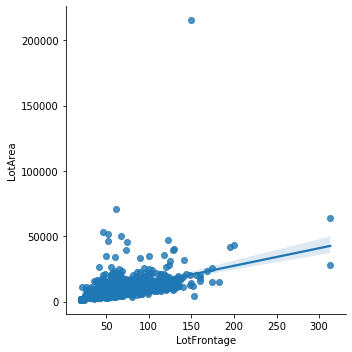

In [30]:
# Lot Frontage

sns.lmplot(x='LotFrontage',y='LotArea',data=full)

In [31]:
# We see a strong linear correlation with the LotArea variable
# We will ue the regression results to fill in the NaN values

from sklearn.linear_model import LinearRegression
lot_frontage_data = full[full['LotFrontage'].notnull()]['LotFrontage']
lot_frontage_data = lot_frontage_data.values.reshape(-1,1)
lot_area_data = full[full['LotFrontage'].notnull()]['LotArea']
lot_area_data = lot_area_data.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(lot_area_data,lot_frontage_data)
pred_lot_frontage = lm.predict(full['LotArea'].values.reshape(-1,1))
pred_lot_frontage = pd.DataFrame(pred_lot_frontage)
pred_lot_frontage = pred_lot_frontage.iloc[:,0]
full['LotFrontage'] = full['LotFrontage'].fillna(value = pred_lot_frontage)

In [32]:
# Basements
# From data_describtion we known 'NaN' means 'No Basement'

basements =  ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']  

In [33]:
full[basements] = full[basements].fillna('No Basement')

In [34]:
# Basement full bath & Basementhalfbath
# Similar reasoning applies to the descrete variables: BsmtFullBath and BsmtHalfBath

full[['BsmtFullBath','BsmtHalfBath']] = full[['BsmtFullBath','BsmtHalfBath']].fillna(value=0)

In [35]:
# Basement SF 
# Variables which describe the Square Feet measures in the basement (Both Unfinished and finished basements)

bsmt_sf = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

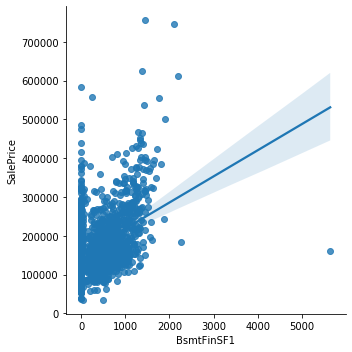

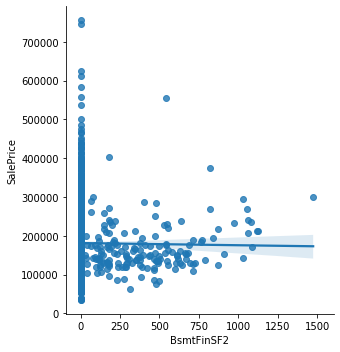

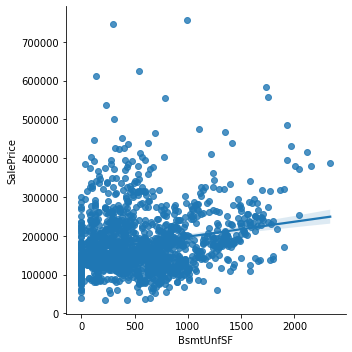

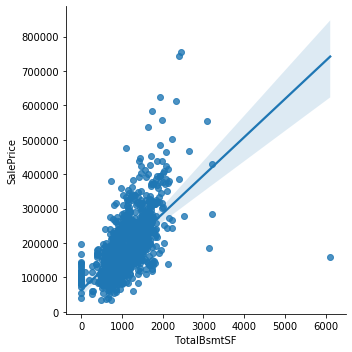

In [36]:
sns.lmplot(x='BsmtFinSF1',y='SalePrice',data=full)
sns.lmplot(x='BsmtFinSF2',y='SalePrice',data=full)
sns.lmplot(x='BsmtUnfSF',y='SalePrice',data=full)
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=full)

In [37]:
# The variable concerning the Unfinished Basements Square Footage (BsmtUnfSF) 
# and Basement Finished Type 2 (BsmtFinSF2) are not hardly correlated with the Sale Price
# 
# Moreover, the Type 1 Basements Finished (BsmtFinSF1) is almost fully correlated 
# with Total Basement Square Feet (TotalBsmtSF) - It will be removed in order to not cause multicollinearity
 
full = full.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

In [38]:
# Garages 
# From data_describtion we known 'NaN' means 'No Garages'
# Further, Garage Year Built null values will be filled in with 0

full['GarageYrBlt'] = full['GarageYrBlt'].fillna(0)
garages = ['GarageType','GarageFinish','GarageQual','GarageCond']  
full[garages] = full[garages].fillna('No Garage')

In [39]:
# Given the small number of null values we will fill in NaN's
# with the most common value "Typ"

full['Functional'] = full['Functional'].fillna('Typ')

In [40]:
# Fireplaces & Fireplaces Qu
# From data_describtion we known 'NaN' means 'No FirePlace'

full['FireplaceQu'] = full['FireplaceQu'].fillna('No fireplace')

In [41]:
# Pool Area Pool Qc

In [42]:
full['PoolQC'].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [43]:
full.groupby('PoolArea').mean()['SalePrice']

PoolArea
0      180404.663455
144              NaN
228              NaN
368              NaN
444              NaN
480    160000.000000
512    235000.000000
519    250000.000000
555    745000.000000
561              NaN
576    171000.000000
648    181000.000000
738    274970.000000
800              NaN
Name: SalePrice, dtype: float64

In [44]:
full['PoolArea'] = full['PoolArea'].fillna(0)

In [45]:
# It looks like pool size does not have a significant impact on sale price
# From data_describtion we known 'NaN' means 'No Pool'
# Therefore we will transform it into a categorical variable

full['PoolArea'] = full['PoolArea'].apply(lambda x : 'Pool' if x >0  else 'No Pool')
full = full.drop('PoolQC',axis=1)

In [46]:
# Misc Features Misc Value
# From data_describtion we known 'NaN' means 'No Misv Features'
# We will also transform it into a dummy variable because there is not enough Misc Features

full['MiscFeature'] = full['MiscFeature'].fillna('No misc feat')
full['MiscFeature'].value_counts()

No misc feat    2814
Shed              95
Gar2               5
Othr               4
TenC               1
Name: MiscFeature, dtype: int64

In [47]:
# We will also transform it into a dummy variable because there is not enough Misc Features

full['MiscFeature'] = full['MiscFeature'].apply(lambda x : 'No misc feat' if x == 'No misc feat' else 'Some Misc Feat')

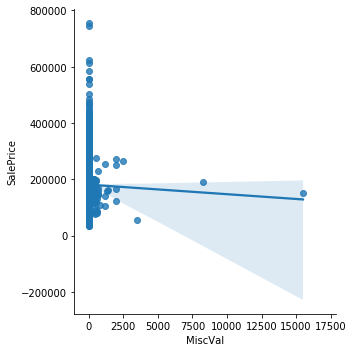

In [48]:
# Misc Val 

sns.lmplot(x='MiscVal',y='SalePrice',data=full)

In [49]:
# Misc Val seems to not have almsot any correlation with Sale Price

full = full.drop('MiscVal',axis=1)


In [50]:
# Fence 
# From data_describtion we known 'NaN' means 'No Fence'

full['Fence'] = full['Fence'].fillna('No fence')

In [51]:
# Garage Cars Garage Area

In [52]:
full['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [53]:
full[full['GarageCars'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1116,2577,70,RM,50.0,9060,Pave,No Alley,Reg,Lvl,Inside,...,0,0,No Pool,MnPrv,No misc feat,3,2007,WD,Alloca,NaN


In [54]:
# Theres only 1 NaN value - fill it with the most common value 

full['GarageCars'] = full['GarageCars'].fillna(2.0)

In [55]:
# We replace this discrete variable with a median so it's a whole number

full['GarageArea'] = full['GarageArea'].fillna(full['GarageArea'].median())

# Some other variables with 1 NaN value



In [56]:
# TotalBsmtSF

In [57]:
# We will monitor the correlation with 1stFlrSF

full[full['TotalBsmtSF'].isna()]['1stFlrSF']

660    896
Name: 1stFlrSF, dtype: int64

<Figure size 432x360 with 0 Axes>

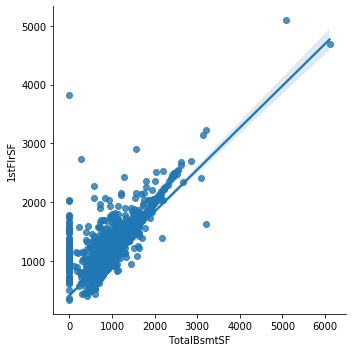

In [58]:
fig = plt.figure(figsize=(6,5))
sns.lmplot(x='TotalBsmtSF',y='1stFlrSF',data=full)

In [59]:
# We approximate the 1stFlrSF value (900) with 800 value 

full['TotalBsmtSF'] = full['TotalBsmtSF'].fillna(800)

In [60]:
# Kitchen Quality

full['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [61]:
full[full['KitchenQual'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
95,1556,50,RL,72.0,10632,Pave,No Alley,IR1,Lvl,Inside,...,0,0,No Pool,No fence,No misc feat,1,2010,COD,Normal,NaN


In [62]:
full.groupby('KitchenQual').mean()['SalePrice']

KitchenQual
Ex    328554.670000
Fa    105565.205128
Gd    212116.023891
TA    139962.511565
Name: SalePrice, dtype: float64

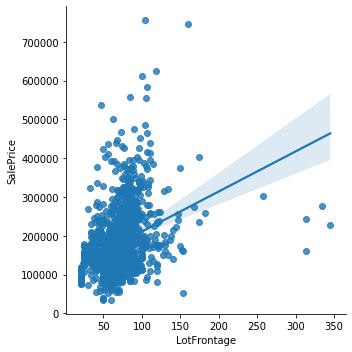

In [63]:
# We will use the correlation of the lot frontage with the price to predict the Kitchen Qual

sns.lmplot(x='LotFrontage',y='SalePrice',data=full)

In [64]:
# Kitchen Qual in that case is most likely good

full['KitchenQual'] = full['KitchenQual'].fillna('Gd')

In [65]:
# SaleType

full['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [66]:
# We will fill in the 1 NaN with the most common value

full['SaleType'] = full['SaleType'].fillna('WD')

In [67]:
# Electrical 

full['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [68]:
# We will fill in the 1 NaN with the most common value

full['Electrical'] = full['Electrical'].fillna('SBrkr')

# Exploratory analysis and removing variables.

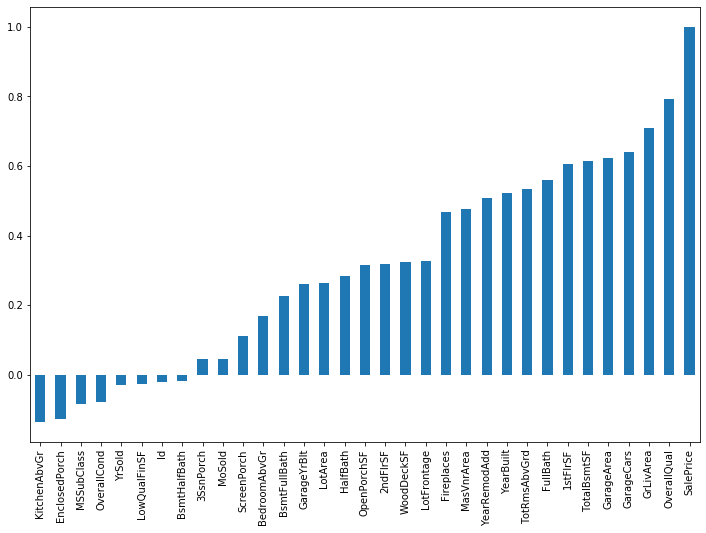

In [69]:
# Correlations with the variable Response variable

plt.figure(figsize=(12,8))
full.corr()['SalePrice'].sort_values().plot(kind='bar')

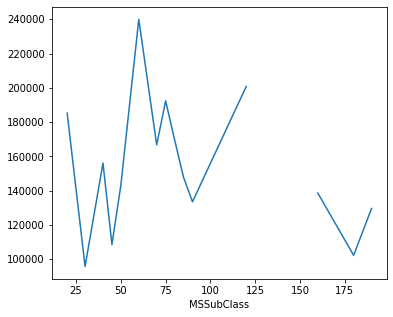

In [70]:
# MSSubClass

full.groupby('MSSubClass').mean()['SalePrice'].plot(fig = plt.figure(figsize=(6,5)))

In [71]:
# We leave this variable as it gives some kind of information

In [72]:
# MSZoning

full['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

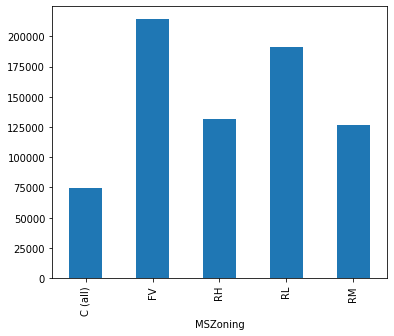

In [73]:
full.groupby('MSZoning').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

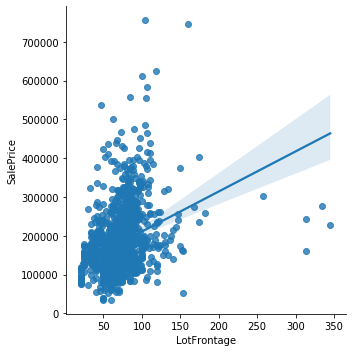

In [74]:
# Lot Frontage

sns.lmplot(x='LotFrontage',y='SalePrice',data=full)

In [75]:
# We will create a list of the variables we will consider removing

consider_removing =[]
consider_removing.append('LotFrontage')

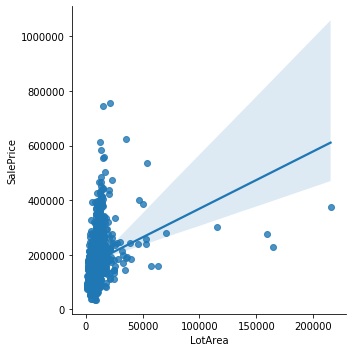

In [76]:
# Lot Area

sns.lmplot(x='LotArea',y='SalePrice',data=full)

In [77]:
consider_removing.append('LotArea')

In [78]:
#Street

full['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

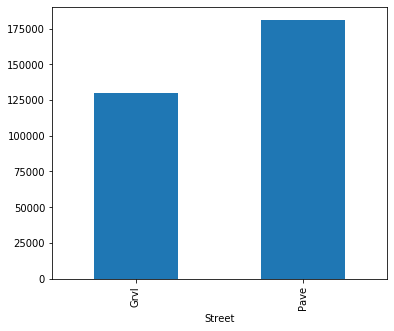

In [79]:
full.groupby('Street').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [80]:
#Alley

full['Alley'].value_counts()

No Alley    2721
Grvl         120
Pave          78
Name: Alley, dtype: int64

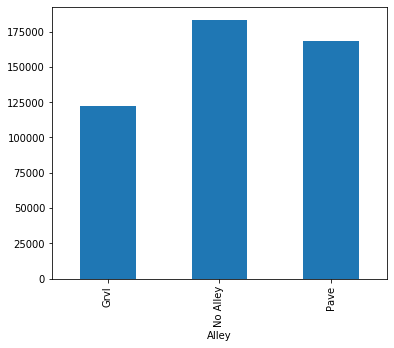

In [81]:
full.groupby('Alley').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [82]:
# Lot Shape 

full['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

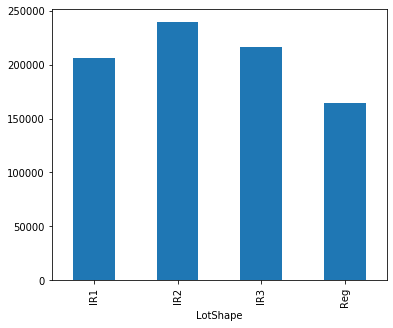

In [83]:
full.groupby('LotShape').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [84]:
consider_removing.append('LotShape')

In [85]:
# LandContour

full['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

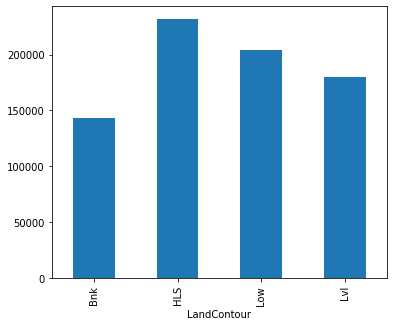

In [86]:
full.groupby('LandContour').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [87]:
full = full.drop('LandContour',axis=1)

In [88]:
# Lot Config

full['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

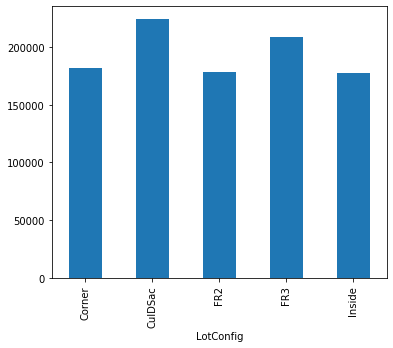

In [89]:
full.groupby('LotConfig').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [90]:
full = full.drop('LotConfig',axis=1)

In [91]:
# Land Slope

full['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

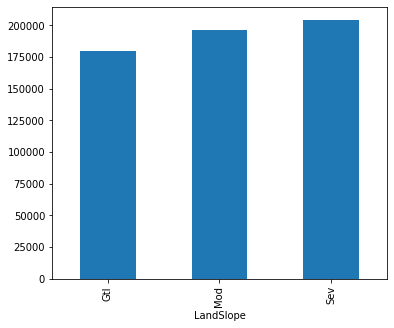

In [92]:
full.groupby('LandSlope').mean()['SalePrice'].plot(kind='bar',figsize=(6,5))

In [93]:
full = full.drop('LandSlope',axis=1)

In [94]:
# Neighbourhood

full['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

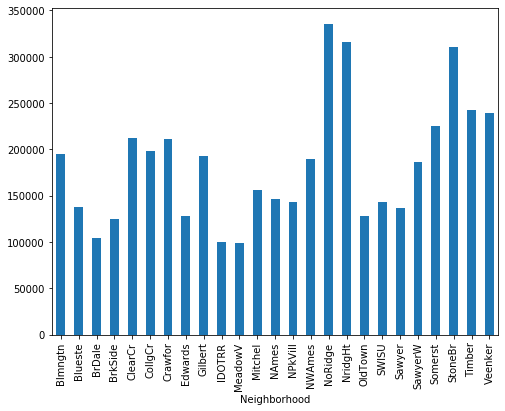

In [95]:
full.groupby('Neighborhood').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(8,6)))

In [96]:
# Condition 1

full['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

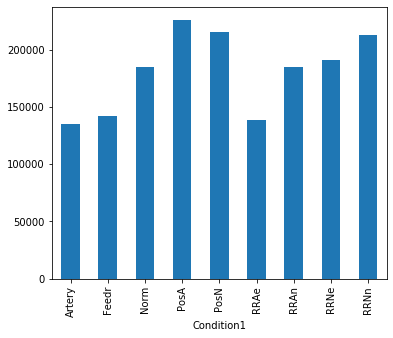

In [97]:
full.groupby('Condition1').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [98]:
# Condition 2

full['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [99]:
full = full.drop('Condition2',axis=1)

In [100]:
# Bldg Type

full['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

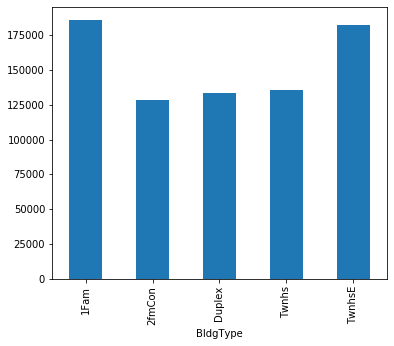

In [101]:
full.groupby('BldgType').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [102]:
# House Style

full['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

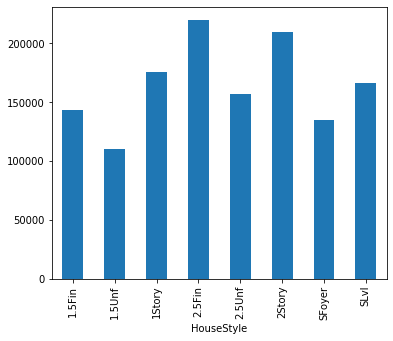

In [103]:
full.groupby('HouseStyle').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [104]:
# Intuitively a 2 story and a 2.5 story house could be grouped into one category
# Given their similar Sale Price Averages we will 

full['HouseStyle'] = full['HouseStyle'].apply(lambda x : '2Story' if x == '2.5Fin' else x)

In [105]:
# Overall Qual 

full['OverallQual'].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

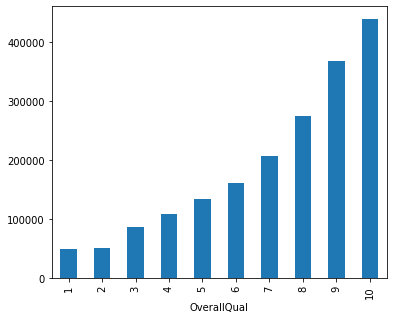

In [106]:
full.groupby('OverallQual').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [107]:
# There is not a lot of values for qualities "1" and "2" 
# Given their similar average price we will make them into 1 category

full['OverallQual'] = full['OverallQual'].apply(lambda x : 2 if x <2 else x)

In [108]:
# OverallCond

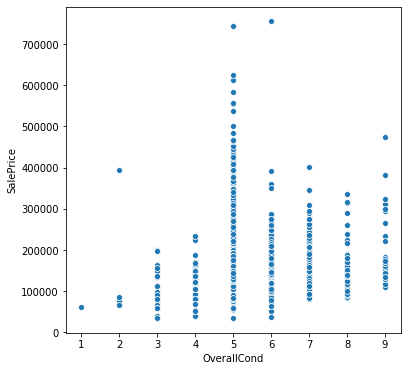

In [109]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x='OverallCond',y='SalePrice',data=full)

In [110]:
# Not too informative
full = full.drop('OverallCond',axis=1)

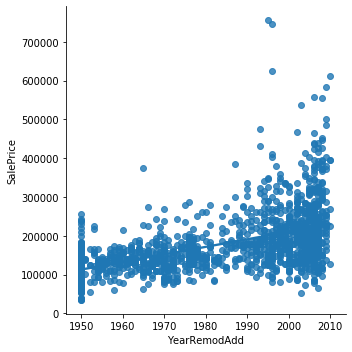

In [111]:
# Year Built Year Remod

sns.lmplot(x='YearRemodAdd',y='SalePrice',data=full)

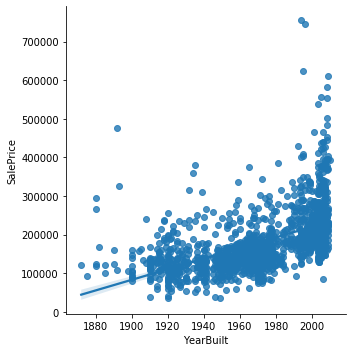

In [112]:
sns.lmplot(x='YearBuilt',y='SalePrice',data=full)

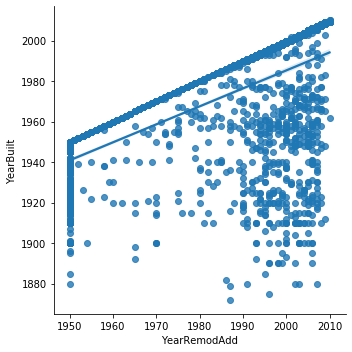

In [113]:
sns.lmplot(x='YearRemodAdd',y='YearBuilt',data=full)

In [114]:
# Lets check correlation if the sale price is higher if the house was renovated

# We will create a new temporary dummy variable to help us investigate

def remod(YearRemodAdd,YearBuilt):
    
    if YearRemodAdd == YearBuilt:
        return 0
    else:
        return 1

In [115]:
full['Remod_dummy'] = full.apply(lambda x : remod(x['YearRemodAdd'], x['YearBuilt']), axis=1)
full['Remod_dummy'].value_counts()

0    1560
1    1359
Name: Remod_dummy, dtype: int64

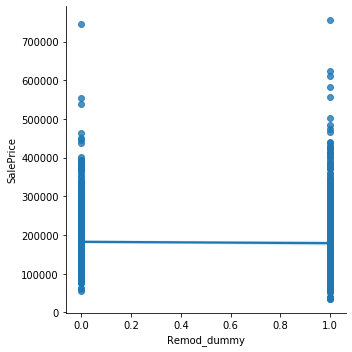

In [116]:
sns.lmplot(x='Remod_dummy',y='SalePrice',data=full)

In [117]:
full.groupby('Remod_dummy').mean()['SalePrice']

Remod_dummy
0    182583.659686
1    179096.307471
Name: SalePrice, dtype: float64

In [118]:
# The Remod dummy was not informative

full = full.drop(['Remod_dummy','YearRemodAdd'],axis=1)

In [119]:
# RoofStyle 

full['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

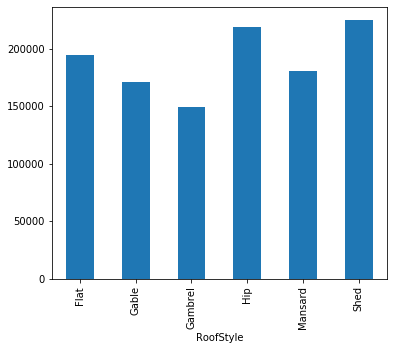

In [120]:
full.groupby('RoofStyle').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

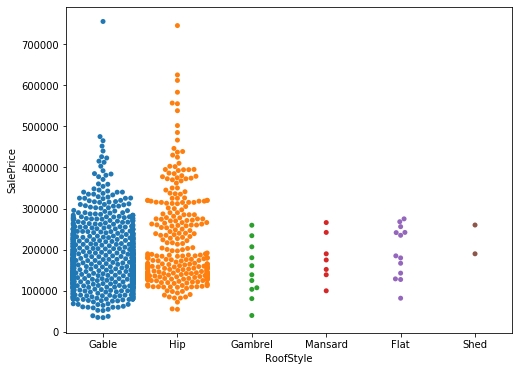

In [121]:
fig = plt.figure(figsize=(8,6))
sns.swarmplot(x='RoofStyle',y='SalePrice',data=full)

In [122]:
consider_removing.append('RoofStyle')

In [123]:
# RoofMatl

full['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [124]:
# Too small diversity of value counts

full = full.drop('RoofMatl',axis=1)

In [125]:
# Exterior1st

full['Exterior1st'].value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

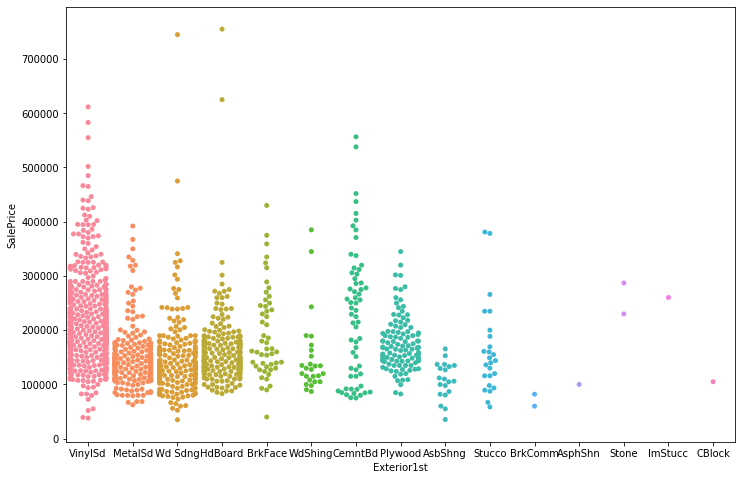

In [126]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Exterior1st',y='SalePrice',data=full)

In [127]:
full.groupby('Exterior1st').mean()['SalePrice']

Exterior1st
AsbShng    107385.550000
AsphShn    100000.000000
BrkComm     71000.000000
BrkFace    194573.000000
CBlock     105000.000000
CemntBd    231690.655738
HdBoard    163077.450450
ImStucc    262000.000000
MetalSd    149422.177273
Plywood    175942.379630
Stone      258500.000000
Stucco     162990.000000
VinylSd    213732.900971
Wd Sdng    149841.645631
WdShing    150655.076923
Name: SalePrice, dtype: float64

In [128]:
#Consider not doing this and leaving or removing this variable

consider_removing.append('Exterior1st')

In [129]:
consider_removing_changing = consider_removing

In [130]:
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'BrkFace' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'WdShing' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'AsbShng' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'Stucco' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'BrkComm' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'CBlock' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'AsphShn' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'Stone' else x)
full['Exterior1st'] = full['Exterior1st'].apply(lambda x : 'Other' if x == 'ImStucc' else x)

In [131]:
#Exterior2nd

full['Exterior2nd'].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

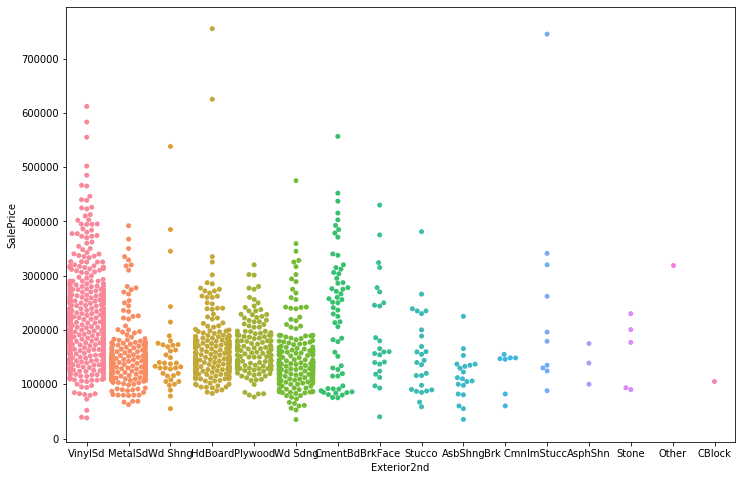

In [132]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Exterior2nd',y='SalePrice',data=full)

In [133]:
# MasVnrType

full['MasVnrType'].value_counts()

None       1744
BrkFace     879
Stone       271
BrkCmn       25
Name: MasVnrType, dtype: int64

In [134]:
full.groupby('MasVnrType').mean()['SalePrice']

MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156273.223121
Stone      264340.400000
Name: SalePrice, dtype: float64

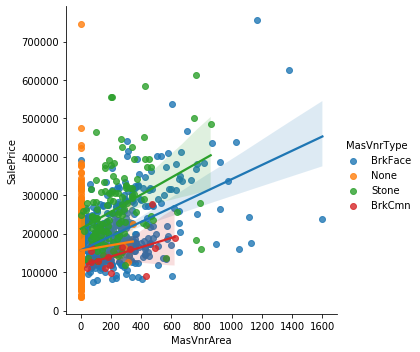

In [135]:
# MasVnrArea

# We can see a clear distinction between the types of MasVnrType

sns.lmplot(x='MasVnrArea',y='SalePrice',data=full,hue='MasVnrType')

In [136]:
# Exter Qual Exter Cond

In [137]:
full['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [138]:
full.groupby('ExterQual').mean()['SalePrice']

ExterQual
Ex    367360.961538
Fa     87985.214286
Gd    231633.510246
TA    144341.313466
Name: SalePrice, dtype: float64

In [139]:
full['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [140]:
full.groupby('ExterCond').mean()['SalePrice']

ExterCond
Ex    201333.333333
Fa    102595.142857
Gd    168897.568493
Po     76500.000000
TA    184034.896256
Name: SalePrice, dtype: float64

In [141]:
# Value Counts more evenly distributed in Exter Qual

full = full.drop('ExterCond',axis=1)

In [142]:
# Foundation

full['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

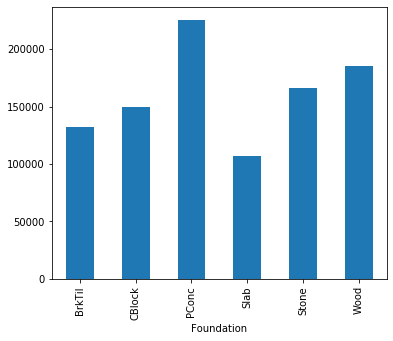

In [143]:
full.groupby('Foundation').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [144]:
# We will group Stone and Wood together as there is very few of them

full['Foundation'] = full['Foundation'].apply(lambda x : 'Other' if x == 'Stone' else x)
full['Foundation'] = full['Foundation'].apply(lambda x : 'Other' if x == 'Wood' else x)

In [145]:
# Bsmnt Qual Bsmt Cond

full['BsmtQual'].value_counts()

TA             1283
Gd             1209
Ex              258
Fa               88
No Basement      81
Name: BsmtQual, dtype: int64

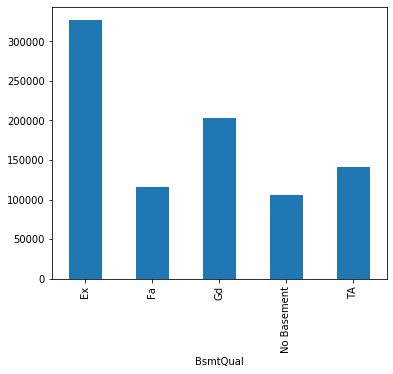

In [146]:
full.groupby('BsmtQual').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [147]:
full['BsmtCond'].value_counts()

TA             2606
Gd              122
Fa              104
No Basement      82
Po                5
Name: BsmtCond, dtype: int64

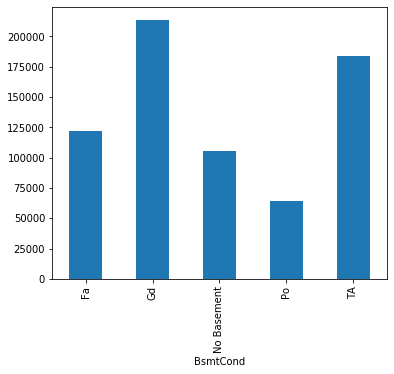

In [148]:
full.groupby('BsmtCond').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [149]:
# Same reasoning as before, Bsmt Qual better value countns distribution

full = full.drop('BsmtCond',axis=1)

In [150]:
# Bsmt Exposure

full['BsmtExposure'].value_counts()

No             1904
Av              418
Gd              276
Mn              239
No Basement      82
Name: BsmtExposure, dtype: int64

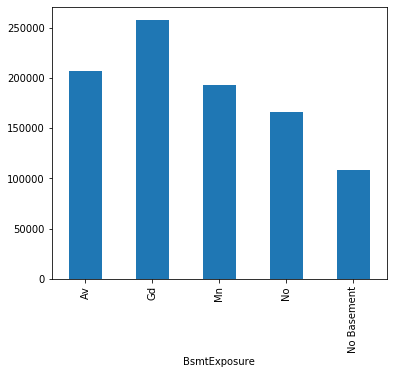

In [151]:
full.groupby('BsmtExposure').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

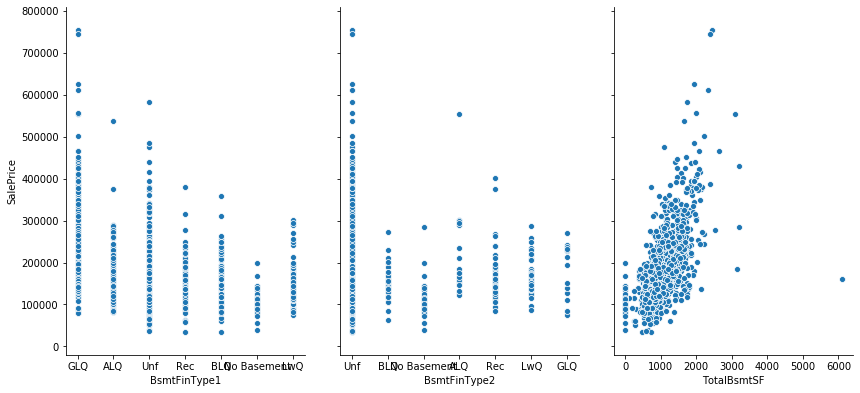

In [152]:
# Bsmt Fin type 1 Bsmt Fin type 2 Total Bsmt SF

bp = sns.pairplot(data=full,x_vars=['BsmtFinType1','BsmtFinType2','TotalBsmtSF'],y_vars=['SalePrice'])
bp.fig.set_size_inches(12,6)

In [153]:
consider_removing_changing.append(['BsmtFinType1','BsmtFinType2'])
full = full.drop(['BsmtFinType1','BsmtFinType2'],axis=1)

In [154]:
#  Heating Heating Qual

full['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [155]:
full['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

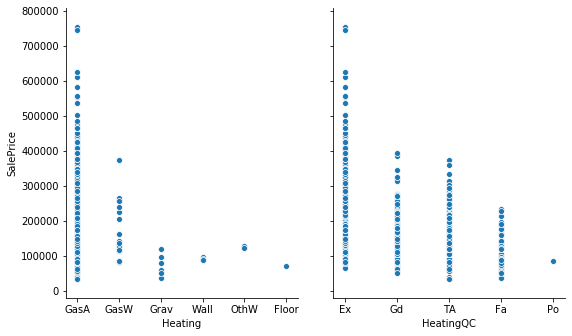

In [156]:
hp = sns.pairplot(data=full,x_vars=['Heating','HeatingQC'],y_vars=['SalePrice'])
hp.fig.set_size_inches(8,5)

In [157]:
# We will compile the heating types into a category "Other" where there is only few
# "Po" Heating QC analogly goes to "Fa"

full['Heating'] = full['Heating'].apply(lambda x : 'Other' if x == 'Wall' else x)
full['Heating'] = full['Heating'].apply(lambda x : 'Other' if x == 'OthW' else x)
full['Heating'] = full['Heating'].apply(lambda x : 'Other' if x == 'Floor' else x)
full['HeatingQC'] = full['HeatingQC'].apply(lambda x : 'Fa' if x == 'Po' else x)

In [158]:
# Central Air

full['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

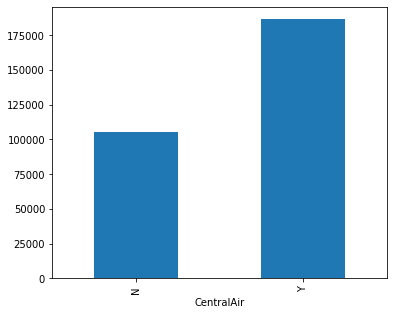

In [159]:
full.groupby('CentralAir').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [160]:
# Electrical 

full['Electrical'].value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

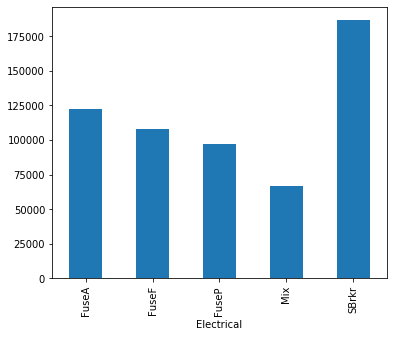

In [161]:
full.groupby('Electrical').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [162]:
# We will add the 'Mix' category because it is the second from the bottom 
# in terms of Sale Price average

full['Electrical'] = full['Electrical'].apply(lambda x : 'FuseP' if x == 'Mix' else x)

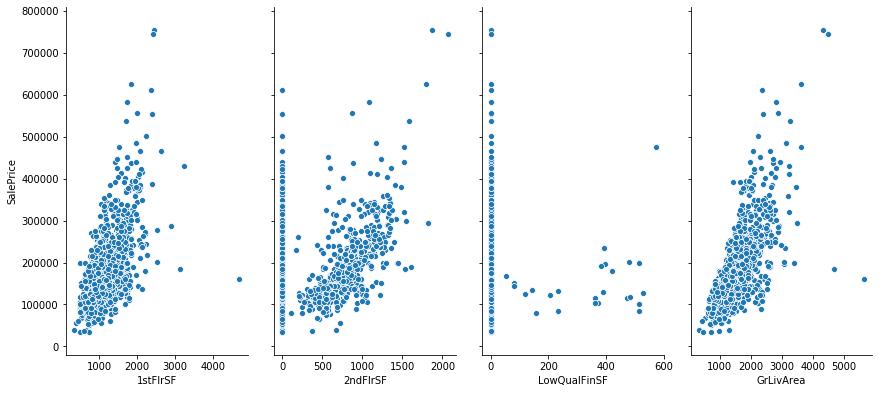

In [163]:
# 1stFlrSF 2ndFlrSF  LowQualFinSF GrLivArea

fp = sns.pairplot(data=full,x_vars=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'],y_vars=['SalePrice'])
fp.fig.set_size_inches(12,6)

In [164]:
# There is already a categorical variable with the information whether the house is 1floor or 2floor
# We Will Create this dummy just in case we will drop that house style column

full['FloorDummy'] = full['2ndFlrSF'].apply(lambda x : 0 if x == 0 else 1)
consider_removing_changing.append('FloorDummy')

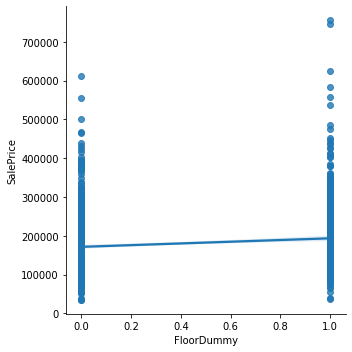

In [165]:
sns.lmplot(x='FloorDummy',y='SalePrice',data=full)

In [166]:
lrd = LinearRegression()
lrd.fit(full[full['SalePrice'].notna()]['FloorDummy'].values.reshape(-1,1),
        full[full['SalePrice'].notna()]['SalePrice'].values.reshape(-1,1))
a = full[full['SalePrice'].notna()]['FloorDummy'].values.reshape(-1,1)
b = full[full['SalePrice'].notna()]['SalePrice'].values.reshape(-1,1)
lrd.score(a,b)

0.018949087253435026

In [167]:
# No correlation so we drop the FloorDummy

full = full.drop('FloorDummy',axis=1)

In [168]:
# We will add the 1st floor and 2nd floor SF and create a total SF variable

full['TotalSF'] = full['1stFlrSF']+full['2ndFlrSF']

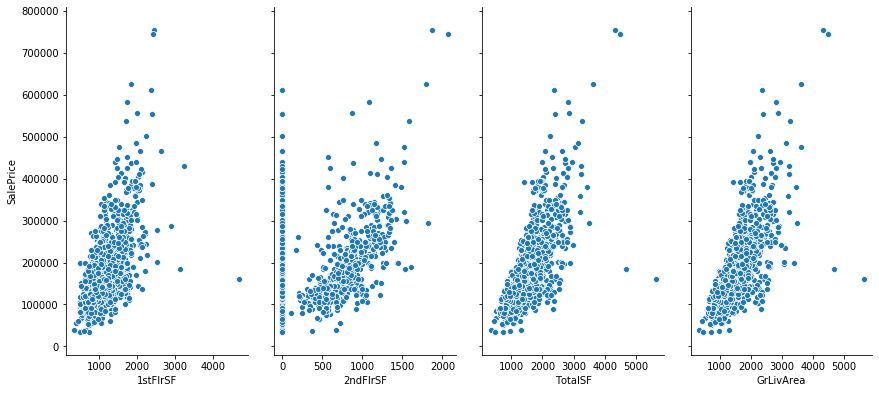

In [169]:
fp = sns.pairplot(data=full,x_vars=['1stFlrSF','2ndFlrSF','TotalSF','GrLivArea'],y_vars=['SalePrice'])
fp.fig.set_size_inches(12,6)

In [170]:
# We see Total SF did not really difer from GrLivArea so we will drop it

full = full.drop(['1stFlrSF','2ndFlrSF','TotalSF'],axis=1)

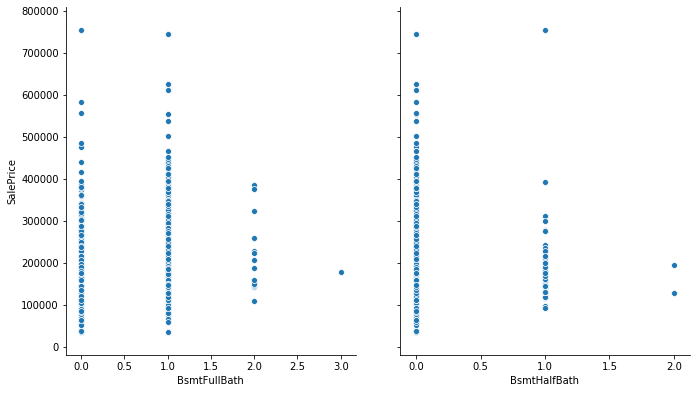

In [171]:
# BsmtFullBath  BsmtHalfBath 

bathp = sns.pairplot(data=full,x_vars=['BsmtFullBath','BsmtHalfBath'],y_vars=['SalePrice'])
bathp.fig.set_size_inches(10,6)

In [172]:
# We will make it into one variable 
# We will also simplofy it to a dummy with 0 or 1 bathrooms in Bsmt

full['BsmtBath'] = full['BsmtFullBath'] + full['BsmtHalfBath']
full['BsmtBath'] = full['BsmtBath'].apply(lambda x : 1.0 if x>1 else x)

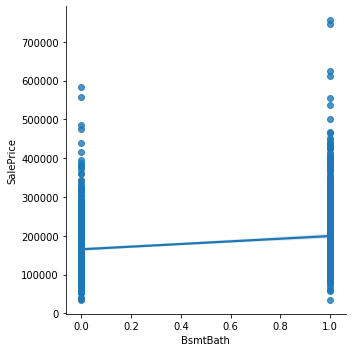

In [173]:
sns.lmplot(x='BsmtBath',y='SalePrice',data=full)

In [174]:
full = full.drop(['BsmtFullBath','BsmtHalfBath'],axis=1)

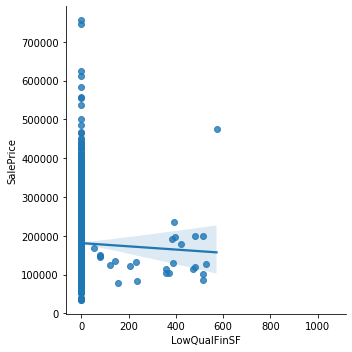

In [175]:
# LowQualFinSF

sns.lmplot(x='LowQualFinSF',y='SalePrice',data=full)

In [176]:
# We Will make a dummy if there are some unfinished

full['SomeUnfinished'] = full['LowQualFinSF'].apply(lambda x: 0 if x==0 else 1)

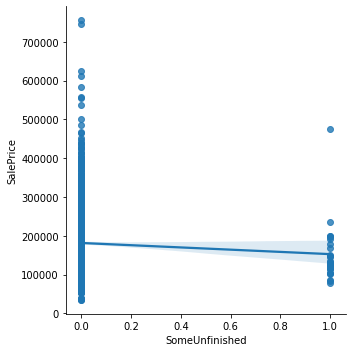

In [177]:
sns.lmplot(x='SomeUnfinished',y='SalePrice',data=full)

In [178]:
# Will use the dummy and drop the LowQualFinSF continuous variable

full=full.drop('LowQualFinSF',axis=1)

In [179]:
consider_removing_changing.append('LowQualFinSF')

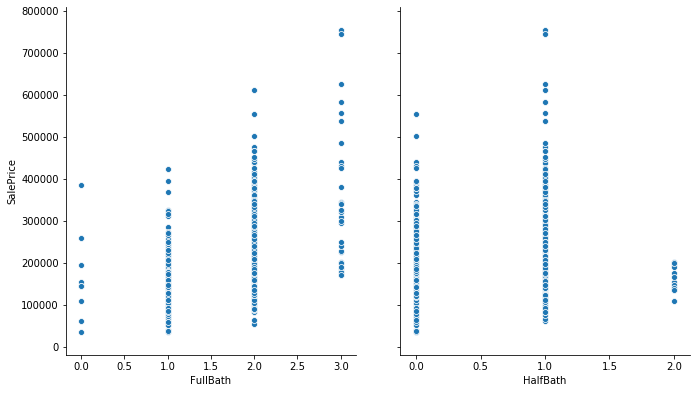

In [180]:
# Full Bath Half Bath

bathp = sns.pairplot(data=full,x_vars=['FullBath','HalfBath'],y_vars=['SalePrice'])
bathp.fig.set_size_inches(10,6)

In [181]:
# We will sum up the Half Bath and Full Bath Variables as it is more informative

full['Bath'] = full['FullBath'] + full['HalfBath']

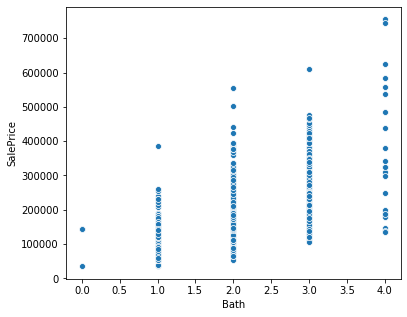

In [182]:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(x='Bath',y='SalePrice',data=full)

In [183]:
# We will also take the 2 0's and them to 1's

full['Bath'] = full['Bath'].apply(lambda x: 1.0 if x == 0 else x )
full = full.drop(['FullBath','HalfBath'],axis=1)

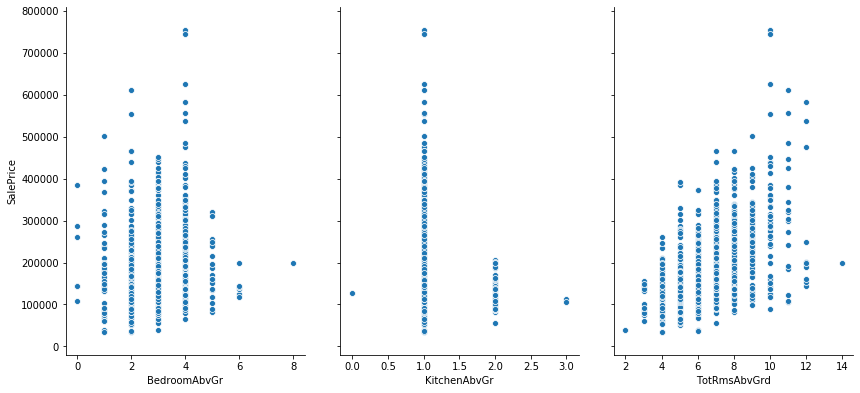

In [184]:
# BedroomAbvGr KitchenAbvGr TotRmsAbvGrd

roomp = sns.pairplot(data=full,x_vars=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'],y_vars=['SalePrice'])
roomp.fig.set_size_inches(12,6)

In [185]:
# We will consider creating a TotalRooms variable of all rooms summed up

full['TotalR'] = full['BedroomAbvGr'] + full['KitchenAbvGr']

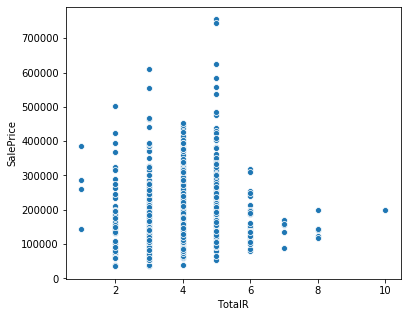

In [186]:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(x='TotalR',y='SalePrice',data=full)

In [187]:
# Total R tunrs out to be not too informative, we will stick to using BedroomAbvGr
# and drop the Kitchen Abv Gr variable as it is not informative

full['BedroomAbvGr'] = full['BedroomAbvGr'].apply(lambda x : 5 if x == 8 else x )
full['BedroomAbvGr'] = full['BedroomAbvGr'].apply(lambda x : 5 if x == 6 else x )
full['BedroomAbvGr'] = full['BedroomAbvGr'].apply(lambda x : 1 if x == 0 else x )
full = full.drop(['TotalR','KitchenAbvGr'],axis=1)

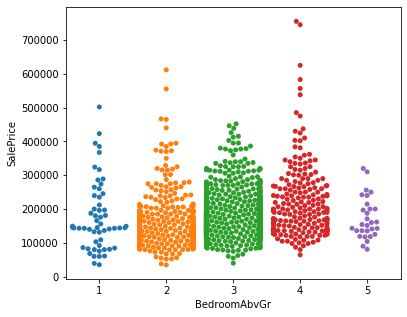

In [188]:
fig = plt.figure(figsize=(6,5))
sns.swarmplot(x='BedroomAbvGr',y='SalePrice',data=full)

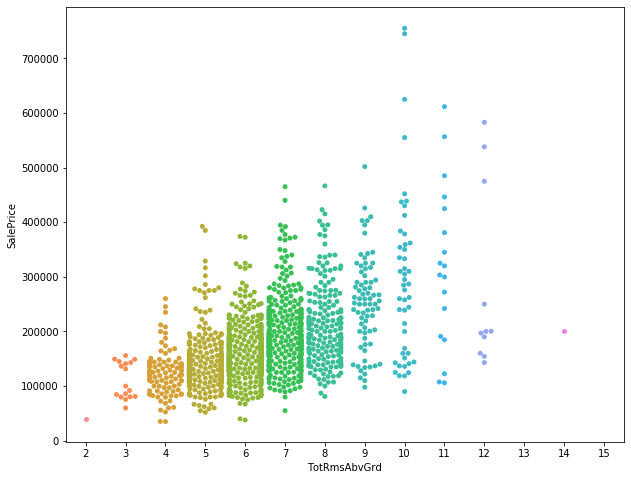

In [189]:
fig = plt.figure(figsize=(10,8))
sns.swarmplot(x='TotRmsAbvGrd',y='SalePrice',data=full)

In [190]:
full['TotRmsAbvGrd'] = full['TotRmsAbvGrd'].apply(lambda x : 12 if x == 13 else x )
full['TotRmsAbvGrd'] = full['TotRmsAbvGrd'].apply(lambda x : 12 if x == 14 else x )
full['TotRmsAbvGrd'] = full['TotRmsAbvGrd'].apply(lambda x : 12 if x == 15 else x )
full['TotRmsAbvGrd'] = full['TotRmsAbvGrd'].apply(lambda x : 3 if x == 2 else x )

In [191]:
# Functional

full['Functional'].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

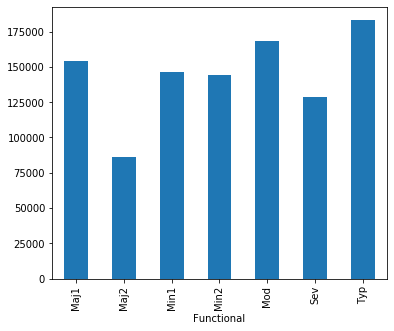

In [192]:
full.groupby('Functional').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [193]:
# We will create an "Other" category for the values with a low count

full['Functional'] = full['Functional'].apply(lambda x : 'Other' if x == 'Sev' else x )
full['Functional'] = full['Functional'].apply(lambda x : 'Other' if x == 'Maj1' else x )
full['Functional'] = full['Functional'].apply(lambda x : 'Other' if x == 'Maj2' else x )
consider_removing_changing.append('Functional')

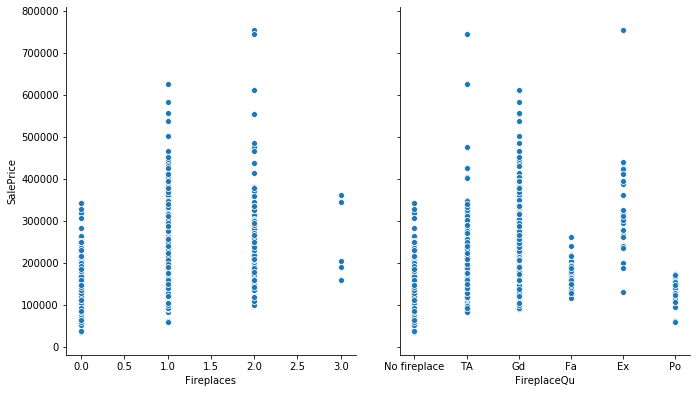

In [194]:
# Fireplaces  FireplaceQu

roomp = sns.pairplot(data=full,x_vars=['Fireplaces','FireplaceQu'],y_vars=['SalePrice'])
roomp.fig.set_size_inches(10,6)

In [195]:
# We will put the "Ex" fireplaces with "Gd" becaue they did not influence the sales price

full['FireplaceQu'] = full['FireplaceQu'].apply(lambda x : 'Gd' if x =='Ex' else x)

# Similar reasonign applies to the number of fireplaces

full['Fireplaces'] = full['Fireplaces'].apply(lambda x : 2.0 if x == 3.0 else x)

In [196]:
# GarageType GarageYrBlt GarageFinish GarageCars GarageArea GarageQual GarageCond

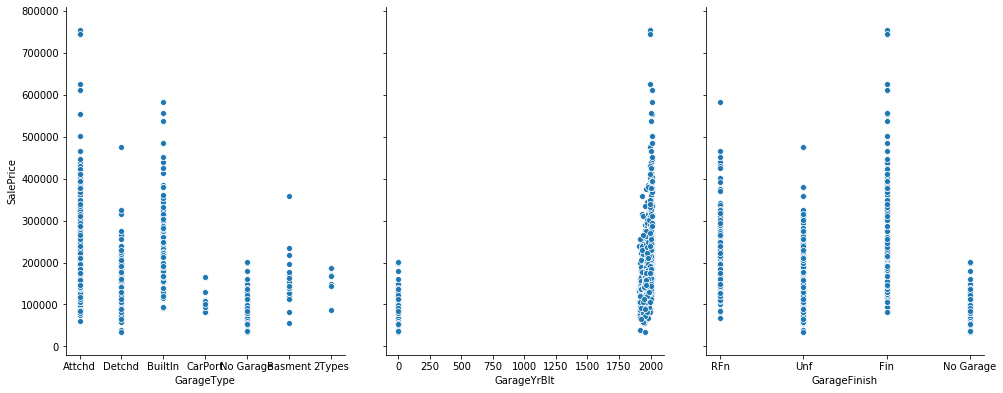

In [197]:
garagep = sns.pairplot(data=full,x_vars=['GarageType','GarageYrBlt','GarageFinish'],y_vars=['SalePrice'])
garagep.fig.set_size_inches(14,6)

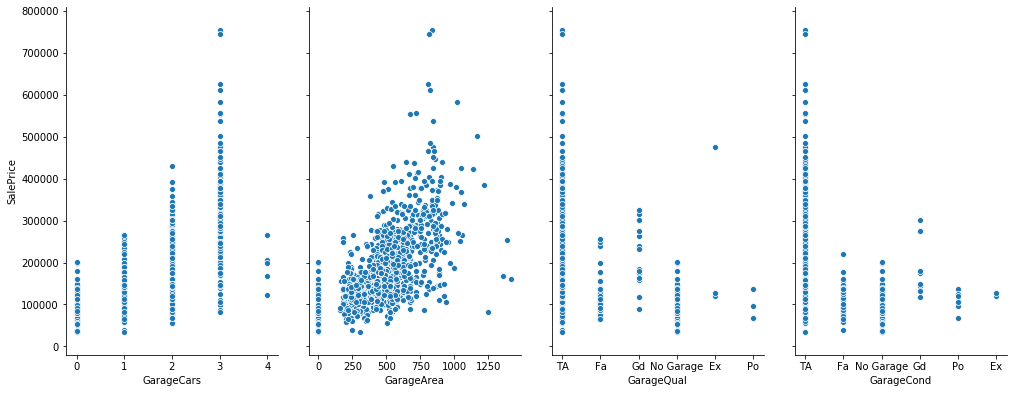

In [198]:
garagep2 = sns.pairplot(data=full,x_vars=['GarageCars','GarageArea','GarageQual','GarageCond'],y_vars=['SalePrice'])
garagep2.fig.set_size_inches(14,6)

In [199]:
full['GarageYrBlt'].describe()

count    2919.000000
mean     1870.364166
std       449.686321
min         0.000000
25%      1957.000000
50%      1977.000000
75%      2001.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [200]:
# Variables were we will get rid of the outliers in the train set 

train_out =[]
train_out.append('GarageYrBlt')
train_out.append('GrLivArea')

In [201]:
# A function that helps us classify garages into 6 groups 

def gar(x):
    if x==0:
        return 'No'
    if 1800<x<1920:
        return '6/6 old'
    elif 1920<=x<1940:
        return '5/6 old'
    elif 1940<=x<1960:
        return '4/6 old'
    elif 1960<=x<1980:
        return '3/6 old'
    elif 1980<=x<2000:
        return '2/6 old'
    elif 2000<=x<2020:
        return '1/6 old'
    else:
        return '1/6 old' 

In [202]:
full['GarageYrBlt'] = full['GarageYrBlt'].apply(lambda x: gar(x))

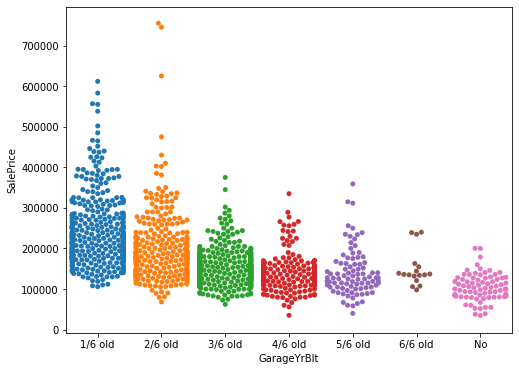

In [203]:
fig = plt.figure(figsize=(8,6))
sns.swarmplot(x='GarageYrBlt',y='SalePrice',data=full,order = ['1/6 old','2/6 old'
                                                               ,'3/6 old','4/6 old','5/6 old','6/6 old','No'])

In [204]:
full['GarageType'].value_counts()

Attchd       1723
Detchd        779
BuiltIn       186
No Garage     157
Basment        36
2Types         23
CarPort        15
Name: GarageType, dtype: int64

In [205]:
# We will classify the non numerous values into other

full['GarageType'] = full['GarageType'].apply(lambda x : x if x in ['Attchd','Detchd','BuiltIn'] else 'Other')

# We will push the number of cars 4 to 3

full['GarageCars'] = full['GarageCars'].apply(lambda x : 3 if x == 4 else x)

In [206]:
# Cond and Qual Very similar

full.groupby('GarageQual').mean()['SalePrice']

GarageQual
Ex           241000.000000
Fa           123573.354167
Gd           215860.714286
No Garage    103317.283951
Po           100166.666667
TA           187489.836003
Name: SalePrice, dtype: float64

In [207]:
full.groupby('GarageCond').mean()['SalePrice']

GarageCond
Ex           124000.000000
Fa           114654.028571
Gd           179930.000000
No Garage    103317.283951
Po           108500.000000
TA           187885.735294
Name: SalePrice, dtype: float64

In [208]:
# Very similar variables, Garage Qual slightly more invormative, we will also move 'Ex' to 'Gd'

full = full.drop('GarageCond',axis=1)
full['GarageQual'] = full['GarageQual'].apply(lambda x : 'Gd' if x =='Ex' else x)

In [209]:
# PavedDrive

full['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

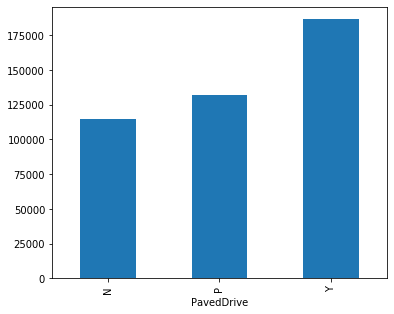

In [210]:
fig = plt.figure(figsize=(6,5))
full.groupby('PavedDrive').mean()['SalePrice'].plot(kind='bar')

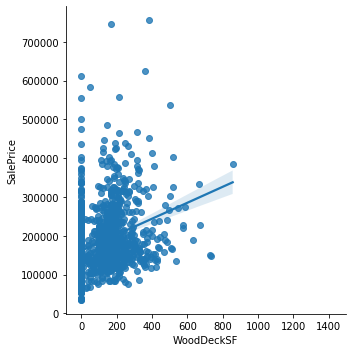

In [211]:
# WoodDeckSF

sns.lmplot(x='WoodDeckSF',y='SalePrice',data=full)

In [212]:
consider_removing_changing.append('WoodDeckSF')
consider_removing_changing.append('SomeUnfinished')

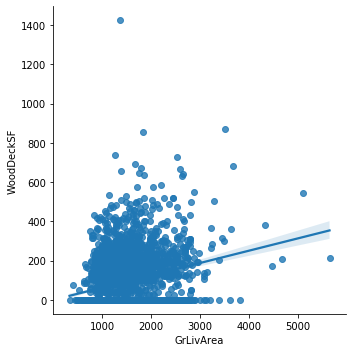

In [213]:
# Now we will see if adding the int variables that have a SF measures increaes the GrLivArea

sns.lmplot(x='GrLivArea',y='WoodDeckSF',data=full)

In [214]:
full.corr()['SalePrice']['GrLivArea']

0.7086244776126511

In [215]:
full['GrLivArea'] =  full['GrLivArea'] + full['WoodDeckSF']

In [216]:
full.corr()['SalePrice']['GrLivArea']

0.7251353053944518

In [217]:
full = full.drop('WoodDeckSF',axis=1)

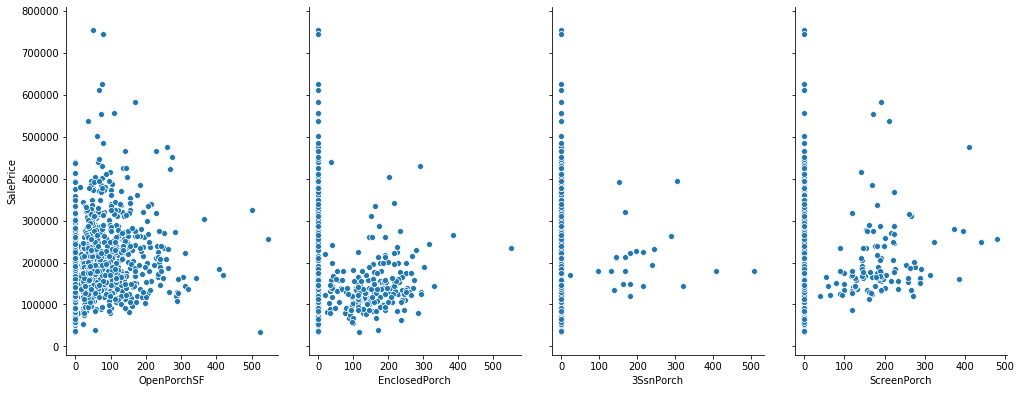

In [218]:
 # OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch
    
porchp2 = sns.pairplot(data=full,x_vars=[ 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],y_vars=['SalePrice'])
porchp2.fig.set_size_inches(14,6)

In [219]:
# We will drop thevariables which dont have an influence on the Sale Price

full = full.drop(['EnclosedPorch','3SsnPorch'] , axis=1)
full['GrLivArea'] =  full['GrLivArea'] + full['OpenPorchSF']

In [220]:
full.corr()['SalePrice']['GrLivArea']

0.7306140254465769

In [221]:
full = full.drop('OpenPorchSF',axis=1)
full['GrLivArea'] =  full['GrLivArea'] + full['ScreenPorch']

In [222]:
full.corr()['SalePrice']['GrLivArea']

0.7322361311445321

In [223]:
full = full.drop('ScreenPorch',axis=1)

In [224]:
# PoolArea 

full['PoolArea'].value_counts()

No Pool    2906
Pool         13
Name: PoolArea, dtype: int64

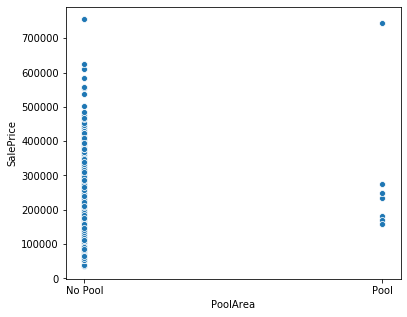

In [225]:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(x='PoolArea',y='SalePrice',data=full)

In [226]:
# The variable is not informative, only a few value counts and very close to general average

full = full.drop('PoolArea',axis=1)

In [227]:
# Fence 

full['Fence']

0       No fence
1       No fence
2       No fence
3       No fence
4       No fence
          ...   
1454    No fence
1455    No fence
1456    No fence
1457       MnPrv
1458    No fence
Name: Fence, Length: 2919, dtype: object

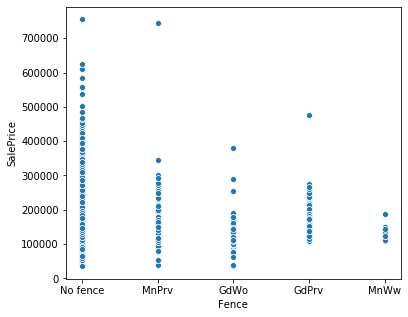

In [228]:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(x='Fence',y='SalePrice',data=full)

In [229]:
full.groupby('Fence').mean()['SalePrice']
consider_removing_changing.append('Fence')

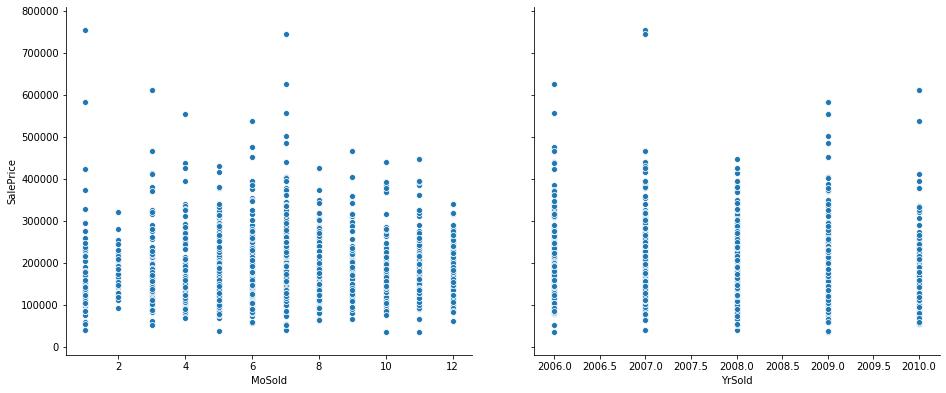

In [230]:
# Mo Sold Year Sold

moyo = sns.pairplot(data=full,x_vars=[ 'MoSold','YrSold'],y_vars=['SalePrice'])
moyo.fig.set_size_inches(14,6)

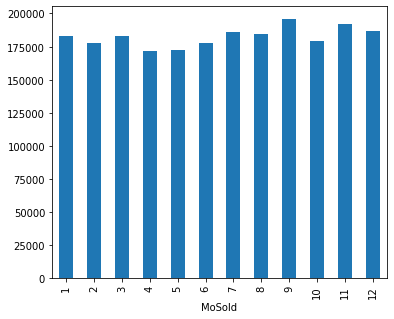

In [231]:
full.groupby('MoSold').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

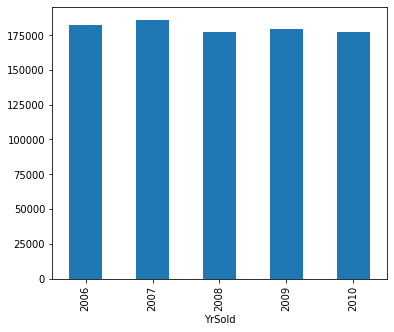

In [232]:
full.groupby('YrSold').mean()['SalePrice'].plot(kind='bar',fig = plt.figure(figsize=(6,5)))

In [233]:
# Not informative variables 

full = full.drop(['MoSold','YrSold'],axis=1)

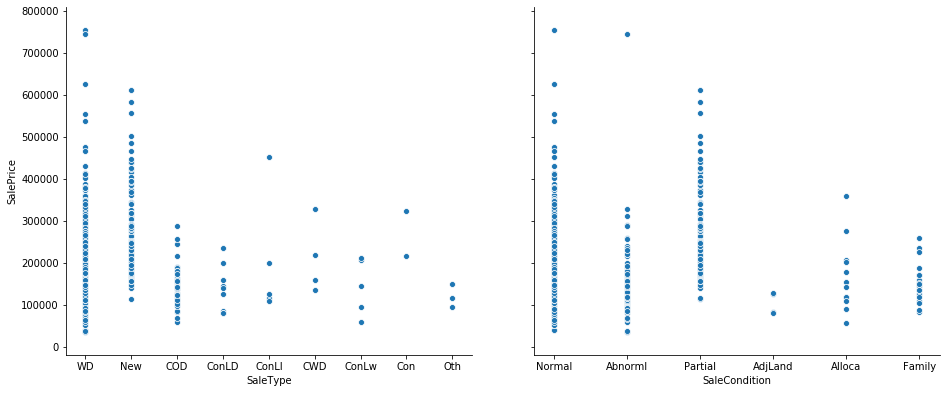

In [234]:
moyo = sns.pairplot(data=full,x_vars=[ 'SaleType','SaleCondition'],y_vars=['SalePrice'])
moyo.fig.set_size_inches(14,6)

"""
SaleType: Type of sale

       WD     Warranty Deed - Conventional
       CWD    Warranty Deed - Cash
       VWD    Warranty Deed - VA Loan
       New    Home just constructed and sold
       COD    Court Officer Deed/Estate
       Con    Contract 15% Down payment regular terms
       ConLw  Contract Low Down payment and low interest
       ConLI  Contract Low Interest
       ConLD  Contract Low Down
       Oth    Other

SaleCondition: Condition of sale

       Normal    Normal Sale
       Abnorml   Abnormal Sale -  trade, foreclosure, short sale
       AdjLand   Adjoining Land Purchase
       Alloca    Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family    Sale between family members
       Partial   Home was not completed when last assessed (associated with New Homes)
"""

In [235]:
# We will Replace the values with a low count with values similar in description with higher values counts

full['SaleCondition'] = full['SaleCondition'].apply(lambda x : 'Alloca' if x == 'AdjLand' else x)
full['SaleType'] = full['SaleType'].apply(lambda x : 'ConLw' if x == 'ConLI' else x )
full['SaleType'] = full['SaleType'].apply(lambda x : 'ConLw' if x == 'ConLD' else x )
full['SaleType'] = full['SaleType'].apply(lambda x : 'WD' if x == 'CWD' else x )
full['SaleType'] = full['SaleType'].apply(lambda x : 'ConLw' if x == 'Con' else x )
full['SaleType'] = full['SaleType'].apply(lambda x : 'COD' if x == 'Oth' else x )

# Creating dummy variables

In [236]:
# Dummies
dum_vars = full.select_dtypes(['object']).columns 
dum_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [237]:
dummies = pd.get_dummies(full[['MSZoning', 'Street', 'Alley', 'LotShape', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']],drop_first=True)
full = full.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],axis=1)
full = pd.concat([full,dummies],axis=1)

In [238]:
full.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,...,Fence_MnWw,Fence_No fence,MiscFeature_Some Misc Feat,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,2003,196.0,856.0,1771,3,...,0,1,0,0,0,1,0,0,1,0
1,2,20,80.0,9600,6,1976,0.0,1262.0,1560,3,...,0,1,0,0,0,1,0,0,1,0
2,3,60,68.0,11250,7,2001,162.0,920.0,1828,3,...,0,1,0,0,0,1,0,0,1,0
3,4,70,60.0,9550,7,1915,0.0,756.0,1752,3,...,0,1,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,8,2000,350.0,1145.0,2474,4,...,0,1,0,0,0,1,0,0,1,0


In [239]:
full = full.drop('Id',axis=1)

# Splitting the concatinated data into the original train set and test set

In [240]:
train = full[full['SalePrice'].notna()]

In [241]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,...,Fence_MnWw,Fence_No fence,MiscFeature_Some Misc Feat,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,2003,196.0,856.0,1771,3,8,...,0,1,0,0,0,1,0,0,1,0
1,20,80.0,9600,6,1976,0.0,1262.0,1560,3,6,...,0,1,0,0,0,1,0,0,1,0
2,60,68.0,11250,7,2001,162.0,920.0,1828,3,6,...,0,1,0,0,0,1,0,0,1,0
3,70,60.0,9550,7,1915,0.0,756.0,1752,3,7,...,0,1,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,2000,350.0,1145.0,2474,4,9,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,1999,0.0,953.0,1687,3,7,...,0,1,0,0,0,1,0,0,1,0
1456,20,85.0,13175,6,1978,119.0,1542.0,2422,3,7,...,0,0,0,0,0,1,0,0,1,0
1457,70,66.0,9042,7,1941,0.0,1152.0,2400,4,9,...,0,0,1,0,0,1,0,0,1,0
1458,20,68.0,9717,5,1950,0.0,1078.0,1444,2,5,...,0,1,0,0,0,1,0,0,1,0


# Removing Outliers 

In [242]:
test = full[full['SalePrice'].isna()]
test = test.drop('SalePrice',axis=1)

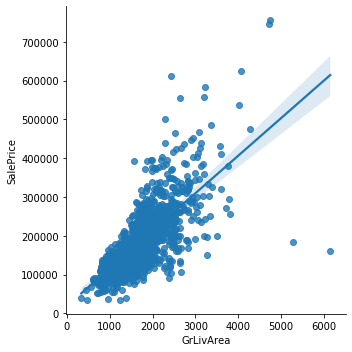

In [243]:
# We will check for removing possible outliers

sns.lmplot(x='GrLivArea',y='SalePrice',data=full)

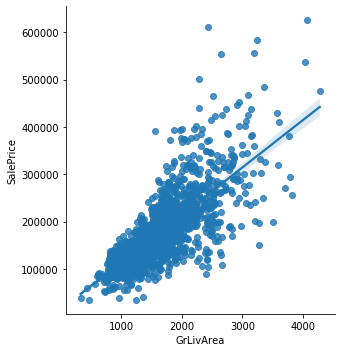

In [244]:
train = train[(train['GrLivArea']<4950) & (train['SalePrice']<700000)]
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

# Train Test Split

In [245]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

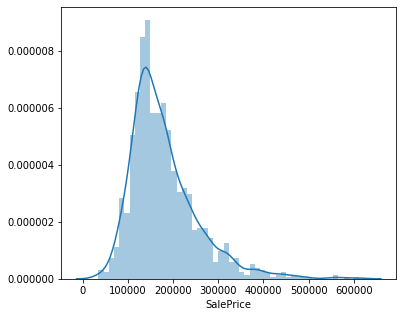

In [247]:
fig = plt.figure(figsize=(6,5))
sns.distplot(y_train[1:],bins=50)

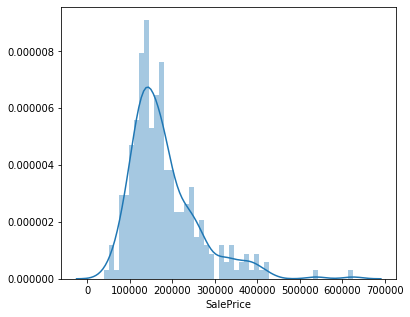

In [248]:
fig = plt.figure(figsize=(6,5))
sns.distplot(y_test[1:],bins=50)

In [249]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [250]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [251]:
# Scaler for the full set model

scaler_model = MinMaxScaler()
X = scaler_model.fit_transform(X)
test = scaler_model.transform(test)

# Models

In [252]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM

# Artifical Neural Network

In [253]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=80)
initializer = tf.keras.initializers.RandomNormal()
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

In [254]:
model = Sequential()

# input layer
model.add(Dense(163,  activation='elu',input_dim = X_train.shape[1],kernel_initializer = initializer,
          kernel_regularizer=regularizers.l1_l2(l1=1e-5,l2=1e-4)))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(70, activation= 'elu', kernel_initializer = initializer,
         kernel_regularizer=regularizers.l1_l2(l1=1e-5,l2=1e-4)))
model.add(Dropout(0.2))

# hidden layer
#model.add(Dense(40, activation='elu',kernel_initializer = initializer,
#        kernel_regularizer=regularizers.l1_l2(l1=1e-5,l2=1e-4)))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1))#kernel_initializer = initializer)

# Compile model
model.compile(loss='mse', optimizer= 'adam')

In [255]:
model.fit(x=X_train,y=y_train
          ,validation_data=(X_test,y_test),callbacks = [early_stop]
          ,batch_size =16,epochs=1200)

Train on 1164 samples, validate on 292 samples
Epoch 1/1200
1164/1164 [==============================] - 1s 704us/sample - loss: 38100167071.2302 - val_loss: 39104630671.7808
Epoch 2/1200
1164/1164 [==============================] - 0s 169us/sample - loss: 37852690917.6082 - val_loss: 38584428656.2192
Epoch 3/1200
1164/1164 [==============================] - 0s 204us/sample - loss: 36885726218.5567 - val_loss: 37062560136.7671TA: 0s - loss: 36094543140.57
Epoch 4/1200
1164/1164 [==============================] - 0s 169us/sample - loss: 34696338709.9931 - val_loss: 34116168633.8630
Epoch 5/1200
1164/1164 [==============================] - 0s 162us/sample - loss: 31049755644.4811 - val_loss: 29683900191.5616
Epoch 6/1200
1164/1164 [==============================] - 0s 167us/sample - loss: 26038914466.7491 - val_loss: 24053343077.6986
Epoch 7/1200
1164/1164 [==============================] - 0s 190us/sample - loss: 20231029049.1821 - val_loss: 18116533612.7123
Epoch 8/1200
1164/1164 [====

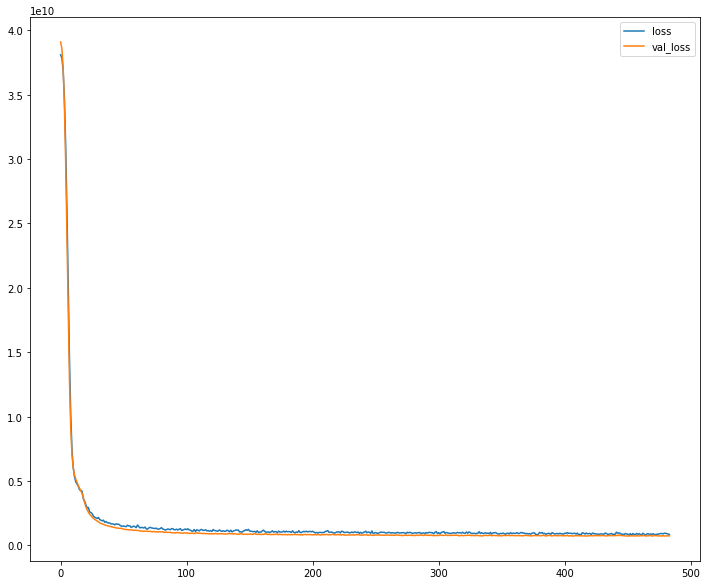

In [256]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(12,10))

In [257]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,mean_squared_log_error
import math

predictions = model.predict(X_test)
print('Mean Absolute Error: ')
print(mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ')
print(np.sqrt(mean_squared_error(y_test,predictions)))
print('Explained Variance Score: ')
print(explained_variance_score(y_test,predictions))
print('Mean Squared log error: ')
print(math.sqrt(mean_squared_log_error(y_test,predictions)))

Mean Absolute Error: 
17605.20134578339
Mean Squared Error: 
26936.813787365973
Explained Variance Score: 
0.894082547698673
Mean Squared log error: 
0.14585463117955721


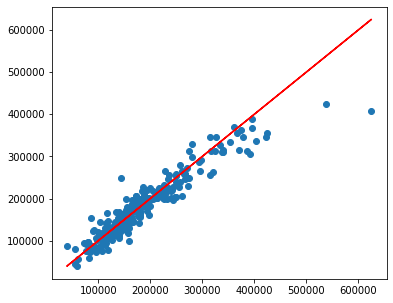

In [258]:
# Our predictions
fig = plt.figure(figsize=(6,5))
plt.scatter(y_test,predictions)

# Perfect predictions

plt.plot(y_test,y_test,'r')

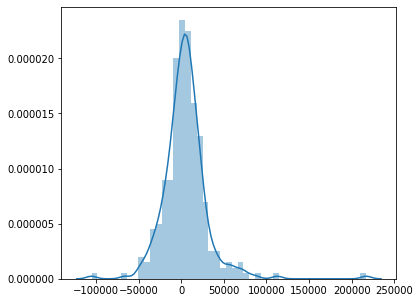

In [259]:
errors = y_test.reshape(292, 1) - predictions
fig = plt.figure(figsize=(6,5))
sns.distplot(errors)

# Training the Artifical Neural Networks model on a full train set

In [260]:
early_stop_new = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=60)

In [261]:
checkpoint_name_test = 'Weights-{epoch:03d}--{loss:.5f}.hdf5' 

In [262]:
checkpoint_test = ModelCheckpoint(checkpoint_name_test, monitor='loss', verbose = 1, save_best_only = True, mode ='auto')
#callbacks_list = [checkpoint]

In [264]:
model.fit(x=X,y=y,
          #callbacks = [early_stop_new]#, checkpoint]
          callbacks = [checkpoint_test]
          ,batch_size =16,epochs=600)

Train on 1456 samples
Epoch 1/600
1392/1456 [===========================>..] - ETA: 0s - loss: 961706425.5632
Epoch 00001: loss improved from inf to 947585855.47253, saving model to Weights-001--947585855.47253.hdf5
1456/1456 [==============================] - 1s 471us/sample - loss: 947585855.4725
Epoch 2/600
1296/1456 [=========================>....] - ETA: 0s - loss: 938595851.4568
Epoch 00002: loss did not improve from 947585855.47253
1456/1456 [==============================] - 0s 199us/sample - loss: 951012156.8352
Epoch 3/600
1392/1456 [===========================>..] - ETA: 0s - loss: 925564893.4253
Epoch 00003: loss improved from 947585855.47253 to 911035504.87912, saving model to Weights-003--911035504.87912.hdf5
1456/1456 [==============================] - 0s 293us/sample - loss: 911035504.8791
Epoch 4/600
1424/1456 [============================>.] - ETA: 0s - loss: 941221029.7528
Epoch 00004: loss did not improve from 911035504.87912
1456/1456 [=============================

# Random Forest Regressor 

In [265]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 64)
forest.fit(X,y)
forest_pred = forest.predict(test)

# Submitting an average of prediction models

In [266]:
num = list(range(1461,2920))

In [267]:
to_submit_forest = forest.predict(test).reshape(-1,1)
to_submit = model.predict(test)

In [268]:
to_submit = to_submit_forest*0.5 + to_submit*0.5 

In [269]:
submission = pd.DataFrame(to_submit, index = num, columns = ['SalePrice'])
submission.index.name = 'Id'
submission.to_csv('../desktop/mix2.forest.ann.csv')
print('Submission mean: ')
print(submission.mean())
submission.head()

Submission mean: 
SalePrice    179199.867626
dtype: float64


,SalePrice
Id,
1461,117905.875000
1462,168350.765625
1463,176954.554688
1464,191836.820312
1465,194365.531250
